<a href="https://colab.research.google.com/github/kennyluu130/K-Means-Clustering-for-Supply-Chain-Optimization/blob/main/K_Means_Clustering_for_Supply_Chain_Optimization_A_Walmart_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means Clustering for Supply Chain Optimization: A Walmart Case Study

- Kenny Luu
- UCLA 2027
- Computer Science and Linguistics
- Data Science Engineering

###Imports

In [ ]:
#Data Manipulation
import pandas as pd
import numpy as np

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Get Kaggle Dataset
import requests
import io

#SciKit
from sklearn.cluster import KMeans

###Create Dataframe

In [ ]:
# Load dataset from Google Drive
file_url = "https://drive.google.com/file/d/1mWbzBoDoAVsY0uEzt1xW0qwy-s7IDLZt/view?usp=drive_link"
file_id = file_url.split("/")[-2]

#URL
url = f"https://drive.google.com/uc?id={file_id}&export=download"

# Send a GET request for binary content
response = requests.get(url)
content = response.content

# Load csv to pandas dataframe
df = pd.read_csv(io.StringIO(content.decode('utf-8')))

###Data Manipulation

In [ ]:
# Set the zip code range
zip_code_min = 90001
zip_code_max = 96162

# Filter the dataframe to include only the rows within the specified range of zip code
df_filtered = df[(df['zip_code'] >= zip_code_min) & (df['zip_code'] <= zip_code_max)]

In [ ]:
# Check filtering
print(df_filtered['zip_code'].min())
print(df_filtered['zip_code'].max())

90221
96130


In [ ]:
# Number of Walmarts in California
len(df_filtered)

281

In [ ]:
# Select relevant features for clustering
df_filtered = df_filtered[['longitude', 'latitude']]

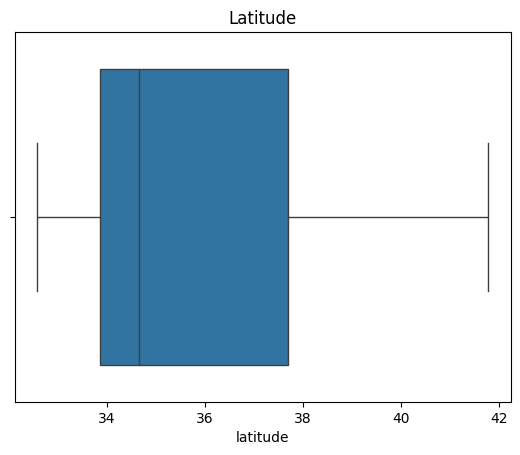

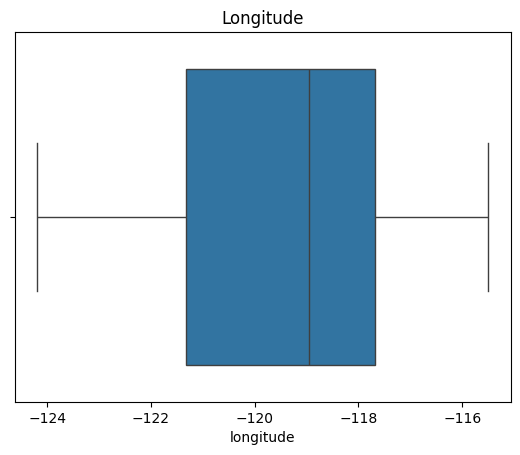

In [ ]:
# Box plot for Latitude and Longitude
sns.boxplot(x=df_filtered['latitude'])
plt.title("Latitude")
plt.show()

sns.boxplot(x=df_filtered['longitude'])
plt.title("Longitude")
plt.show()

###Plot Initial

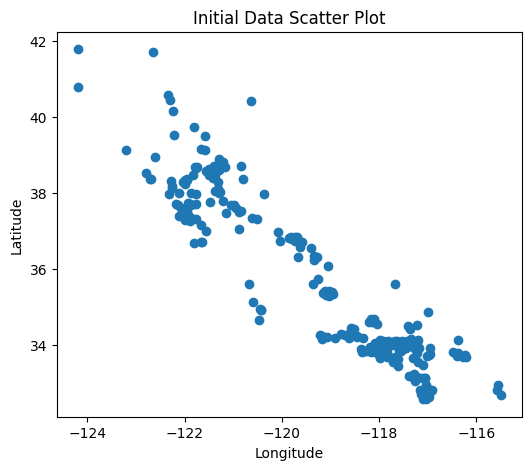

In [ ]:
# Plot Initial Data Points
plt.figure(figsize=(6, 5))
plt.scatter(df_filtered['longitude'],df_filtered['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Initial Data Scatter Plot')
plt.show()

###Apply K-Means with k = 13

In [ ]:
# K-Means with 13 clusters (for 13 supple chain facility locations)
kmeans = KMeans(n_clusters=13, random_state=42)
kmeans.fit(df_filtered[['longitude', 'latitude']])
df_filtered['cluster'] = kmeans.labels_

###Plot with Clusters and Centroids

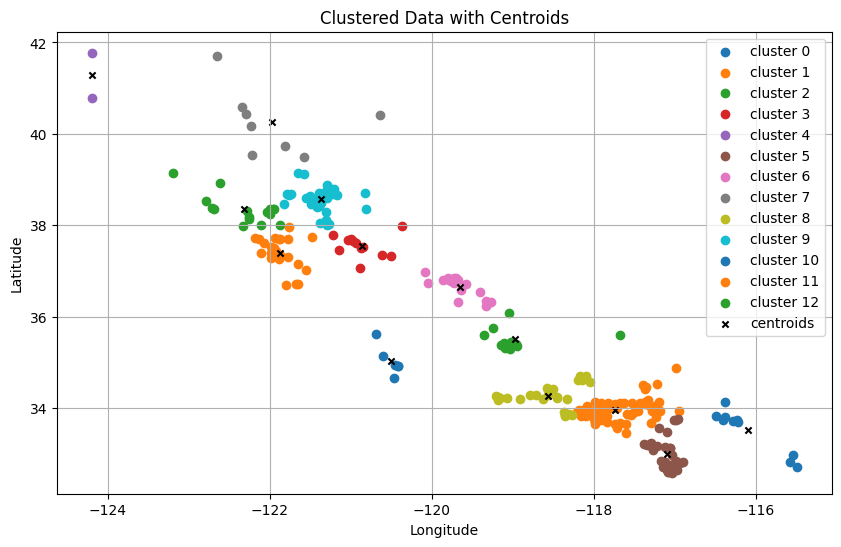

In [ ]:
# Plot again
plt.figure(figsize=(10, 6))

for cluster in range(13):
    cluster_data = df_filtered[df_filtered['cluster'] == cluster]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', s=20, label='centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Data with Centroids')
plt.legend()
plt.grid(True)
plt.show()

#Final Results: Best 13 Supple Chain Facility Locations Based on Distance Metrics

In [ ]:
# print centroids
centroids = kmeans.cluster_centers_
print("Best locations for 13 supple chain facilities (Longitude, Latitude):")
print(centroids)

Best locations for 13 supple chain facilities (Longitude, Latitude):
[[-120.50591288   35.03205567]
 [-117.73711466   33.9571848 ]
 [-122.31500539   38.34414521]
 [-120.86501883   37.54966583]
 [-124.190221     41.277833  ]
 [-117.09378028   32.99816457]
 [-119.65331775   36.64744563]
 [-121.96794026   40.25386824]
 [-118.56052896   34.25618885]
 [-121.37163702   38.58117643]
 [-116.10020204   33.50877873]
 [-121.86760725   37.39589226]
 [-118.97811304   35.49948957]]
